In [17]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Load the Excel file
file_path = '/content/stadat-kor0037-15.1.1.37-en.xlsx'
xls = pd.ExcelFile(file_path)

# Read the relevant sheet by name (the first one)
df = xls.parse(sheet_name=0)

In [19]:
# Extract columns: Year and Mean Temperature (starting from row 3)
data = df.iloc[2:, [0, 1]].copy()
data.columns = ['Year', 'Mean Temperature']

# Keep only valid years (four-digit)
data = data.dropna(subset=['Year'])
data = data[data['Year'].astype(str).str.match(r'^\d{4}$')]

# Convert data types
data['Year'] = data['Year'].astype(int)
data['Mean Temperature'] = pd.to_numeric(data['Mean Temperature'], errors='coerce')

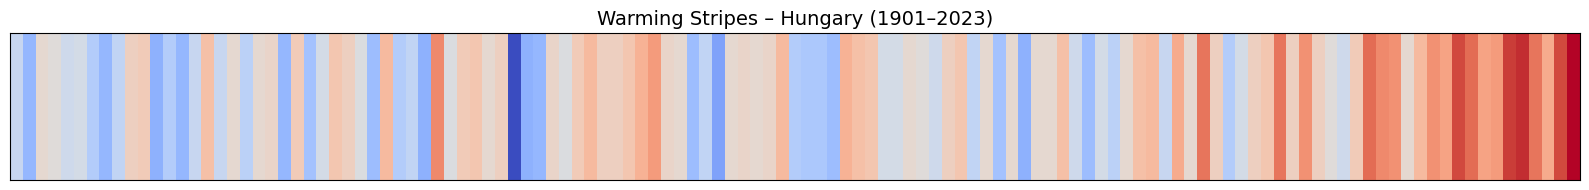

In [20]:
# Plot the warming stripes
plt.figure(figsize=(16, 2))
plt.imshow(
    [data['Mean Temperature']],
    aspect='auto',
    cmap='coolwarm',
    extent=[data['Year'].min(), data['Year'].max(), 0, 1]
)
plt.gca().axes.get_yaxis().set_visible(False)
plt.xticks([])
plt.title('Warming Stripes – Hungary (1901–2023)', fontsize=14)
plt.tight_layout()
plt.show()